In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

# Specify the path to your dataset in Google Drive
dataset_path1 = '/content/drive/My Drive/Anomaly/UNSW_NB15_training-set.csv'
dataset_path2 = '/content/drive/My Drive/Anomaly/UNSW_NB15_testing-set.csv'



In [4]:
df_train = pd.read_csv(dataset_path1)
df_test = pd.read_csv(dataset_path2)
print("Length of training set: ", len(df_train))
print("Length of testing set: ", len(df_test))


Length of training set:  82332
Length of testing set:  175341


In [5]:
#  concatenating training and testing dataset
df = pd.concat([df_train, df_test])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [6]:
df.head()


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [7]:

# Check the distribution of class labels
class_counts = df['label'].value_counts()

# Display the counts
print(class_counts)


1    164673
0     93000
Name: label, dtype: int64


In [8]:
print(df.isna().sum())


id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [9]:
df['attack_cat'].value_counts()

Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

In [10]:
df['state'].value_counts()

FIN    117164
INT    116438
CON     20134
REQ      3833
RST        84
ECO        12
ACC         4
CLO         1
PAR         1
URN         1
no          1
Name: state, dtype: int64

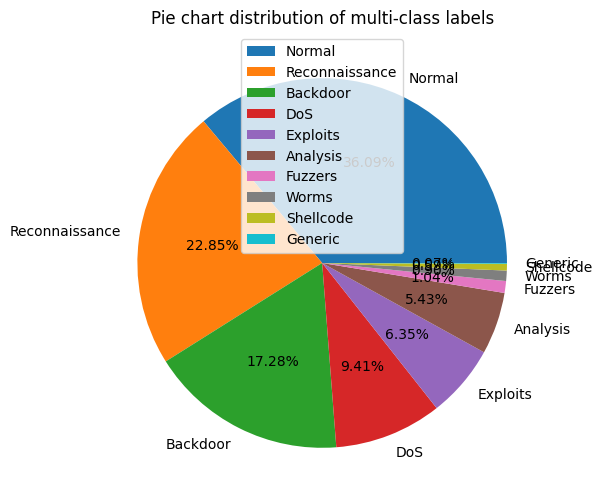

In [11]:
plt.figure(figsize=(6,6))
plt.pie(df.attack_cat.value_counts(),labels=df.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.show()

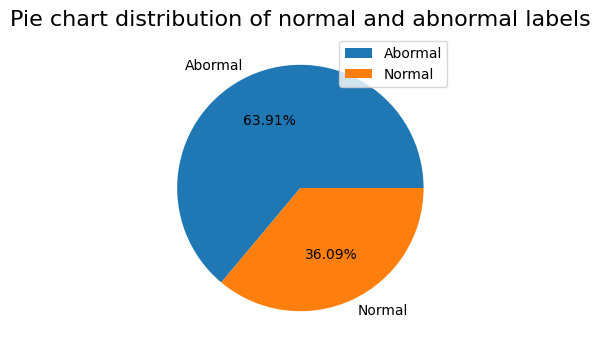

In [12]:
plt.figure(figsize=(4,4))
plt.pie(df.label.value_counts(),labels=['Abormal','Normal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()

In [13]:
df = df.drop(columns=['id', 'attack_cat'])


In [14]:
from sklearn.preprocessing import LabelEncoder
df_cat = df.select_dtypes(exclude=[np.number])
print(df_cat.columns)
for feature in df_cat.columns:
    df[feature] = LabelEncoder().fit_transform(df[feature])


Index(['proto', 'service', 'state'], dtype='object')


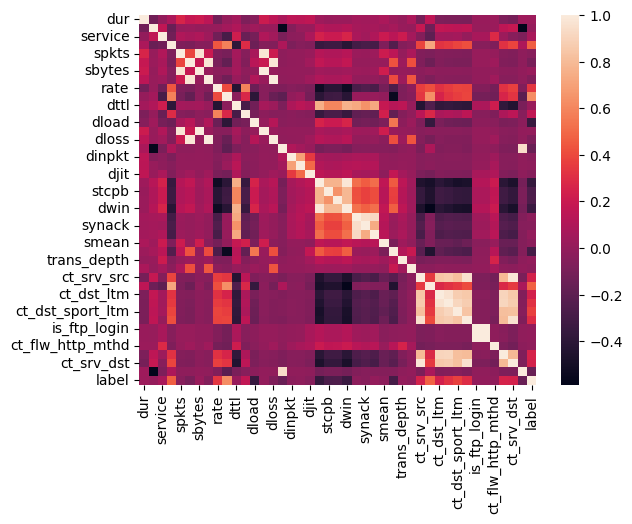

<Figure size 100x100 with 0 Axes>

In [15]:
import seaborn as sns
sns.heatmap(df.corr())
plt.figure(figsize=(1,1))
plt.show()


In [16]:
columns = df.columns.tolist()
corr = df.corr()
correlated_vars = []
for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):
        if corr[columns[i]][columns[j]] > 0.98:
            print(columns[i], columns[j], corr[columns[i]][columns[j]])
            correlated_vars.append(columns[j])


sbytes sloss 0.995771577240686
dbytes dloss 0.9967111338314709
swin dwin 0.9804584289136614
is_ftp_login ct_ftp_cmd 0.9988554882935945


In [17]:
df = df.drop(columns=correlated_vars)


In [18]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['label'])
feature_list = list(X.columns)
X = np.array(X)
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=50)

In [19]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 206138
Testing set: 51535


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
# Extract the features and labels
features = df.drop('label', axis=1)
labels = df['label']
# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Calculate the mean and standard deviation of each feature
mean = np.mean(scaled_features, axis=0)
std = np.std(scaled_features, axis=0)
# Calculate the z-scores of each feature
z_scores = (scaled_features - mean) / std
# Calculate the inter-arrival times of each feature
inter_arrival_times = np.diff(z_scores, axis=0)
# Print the mean, standard deviation, and inter-arrival times of each feature
print('Mean:', mean)
print('Standard deviation:', std)
print('Inter-arrival times:', inter_arrival_times)


Mean: [-2.42663223e-17  3.26492337e-17  2.60311458e-17 -2.15308460e-16
  9.26532307e-18 -2.20602930e-18 -1.10301465e-18 -4.74296300e-18
  4.23557626e-17  2.82371751e-16 -8.82411721e-17 -3.94879245e-17
  1.94130579e-17  9.04472014e-18  2.86783809e-18  1.98542637e-18
  2.40457194e-17  5.11798798e-17 -6.00039970e-17 -7.05929377e-17
 -8.82411721e-18 -2.29427048e-17  1.05889407e-16  3.08844102e-17
 -7.41225846e-17  9.70652893e-18 -2.92298883e-18 -4.23557626e-17
 -3.52964688e-17  2.11778813e-17  6.70632908e-17 -4.23557626e-17
 -4.94150564e-17  1.21331612e-17  8.60351428e-18 -1.23537641e-17
  1.05889407e-17 -3.44140571e-17]
Standard deviation: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Inter-arrival times: [[-5.02151400e-07  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.02151400e-07  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   9.19562998e-02  0.00000000e+00]
 [ 1.67

In [21]:
features.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000011,119,0,5,2,0,496,0,90909.0902,254,...,2,1,1,1,2,0,0,1,2,0
1,0.000008,119,0,5,2,0,1762,0,125000.0003,254,...,2,1,1,1,2,0,0,1,2,0
2,0.000005,119,0,5,2,0,1068,0,200000.0051,254,...,2,1,1,1,3,0,0,1,3,0
3,0.000006,119,0,5,2,0,900,0,166666.6608,254,...,2,2,2,1,3,0,0,2,3,0
4,0.000010,119,0,5,2,0,2126,0,100000.0025,254,...,2,2,2,1,3,0,0,2,3,0


<ipython-input-22-27f19b9ec830>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(features.columns, rotation=45)
<ipython-input-22-27f19b9ec830>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(features.columns, rotation=45)


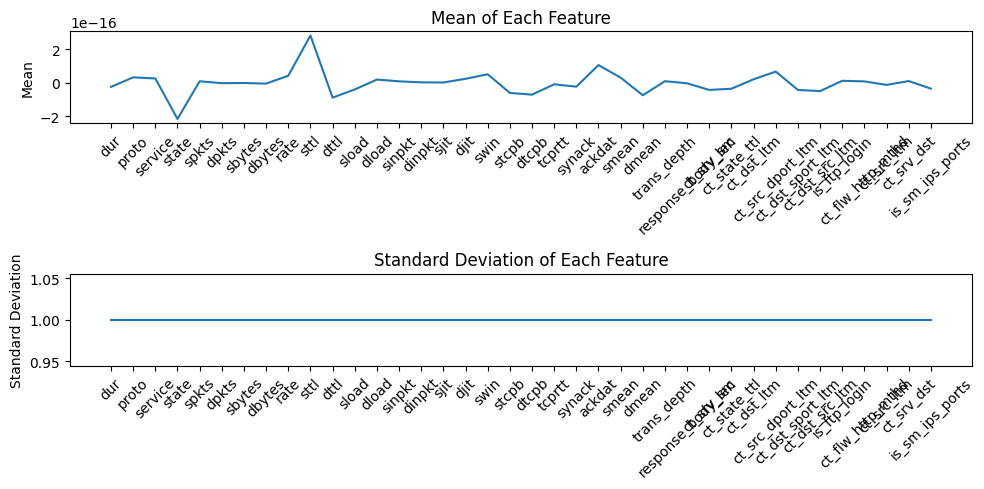

In [22]:
import matplotlib.pyplot as plt

# Create subplots for mean, standard deviation, and inter-arrival times
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5))

# Plot the mean of each feature
ax1.plot(features.columns, mean)
ax1.set_ylabel('Mean')
ax1.set_title('Mean of Each Feature')
# Rotate x-axis labels for readability
ax1.set_xticklabels(features.columns, rotation=45)
# Plot the standard deviation of each feature
ax2.plot(features.columns, std)
ax2.set_ylabel('Standard Deviation')
ax2.set_title('Standard Deviation of Each Feature')
# Rotate x-axis labels for readability
ax2.set_xticklabels(features.columns, rotation=45)

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()


In [23]:
# Calculate packet volume
packet_volume = df.shape[0]
# Calculate protocol distribution
protocol_distribution = df['proto'].value_counts()
# Calculate packet size distribution
packet_size_distribution = df['spkts'].value_counts()
# Print the results
print('Packet volume:', packet_volume)
print('Protocol distribution:', protocol_distribution)
print('Packet size distribution:', packet_size_distribution)


Packet volume: 257673
Protocol distribution: 113    123041
119     92701
120     15599
6        3846
78       3271
        ...  
75        131
89        131
42         48
37         15
91          1
Name: proto, Length: 133, dtype: int64
Packet size distribution: 2       122182
10       43586
12       10112
14        7699
4         6520
         ...  
37           1
406          1
205          1
690          1
1044         1
Name: spkts, Length: 646, dtype: int64


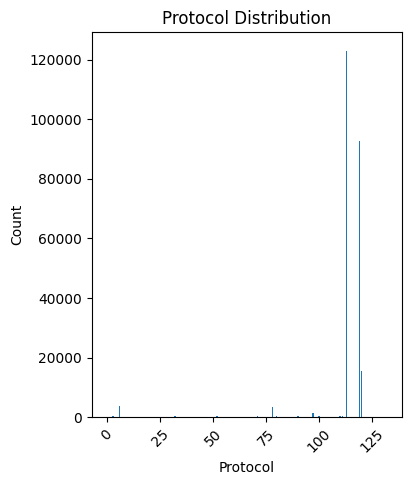

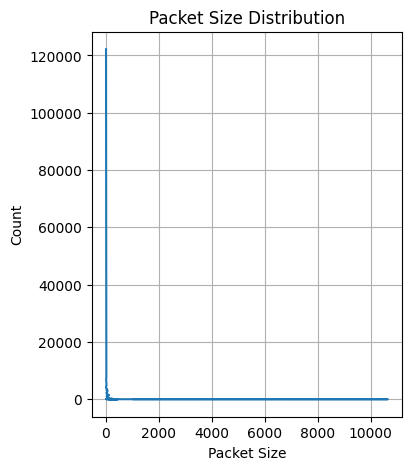

In [24]:
import matplotlib.pyplot as plt

# Create a bar graph for protocol distribution
plt.figure(figsize=(4,5))
plt.bar(protocol_distribution.index, protocol_distribution.values)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Protocol Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

# Create a line graph for packet size distribution
plt.figure(figsize=(4, 5))
plt.plot(packet_size_distribution.index, packet_size_distribution.values)
plt.xlabel('Packet Size')
plt.ylabel('Count')
plt.title('Packet Size Distribution')
plt.grid(True)
plt.show()


In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed

# Reshape the input data to 3D (batch_size, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Define the LSTM-based autoencoder model
model = Sequential()

# Encoder layers
model.add(LSTM(128, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(RepeatVector(X_train.shape[1]))

# Decoder layers
model.add(LSTM(64, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history=model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2,
    shuffle = False)


Epoch 1/5
1289/1289 [==============================] - 381s 289ms/step - loss: 0.2411 - accuracy: 0.8858 - val_loss: 0.1910 - val_accuracy: 0.9066
Epoch 2/5
1289/1289 [==============================] - 367s 285ms/step - loss: 0.1780 - accuracy: 0.9100 - val_loss: 0.1816 - val_accuracy: 0.9102
Epoch 3/5
1289/1289 [==============================] - 362s 281ms/step - loss: 0.1654 - accuracy: 0.9177 - val_loss: 0.1548 - val_accuracy: 0.9216
Epoch 4/5
1289/1289 [==============================] - 367s 284ms/step - loss: 0.1555 - accuracy: 0.9252 - val_loss: 0.1453 - val_accuracy: 0.9316
Epoch 5/5
1289/1289 [==============================] - 367s 285ms/step - loss: 0.1571 - accuracy: 0.9268 - val_loss: 0.1450 - val_accuracy: 0.9323


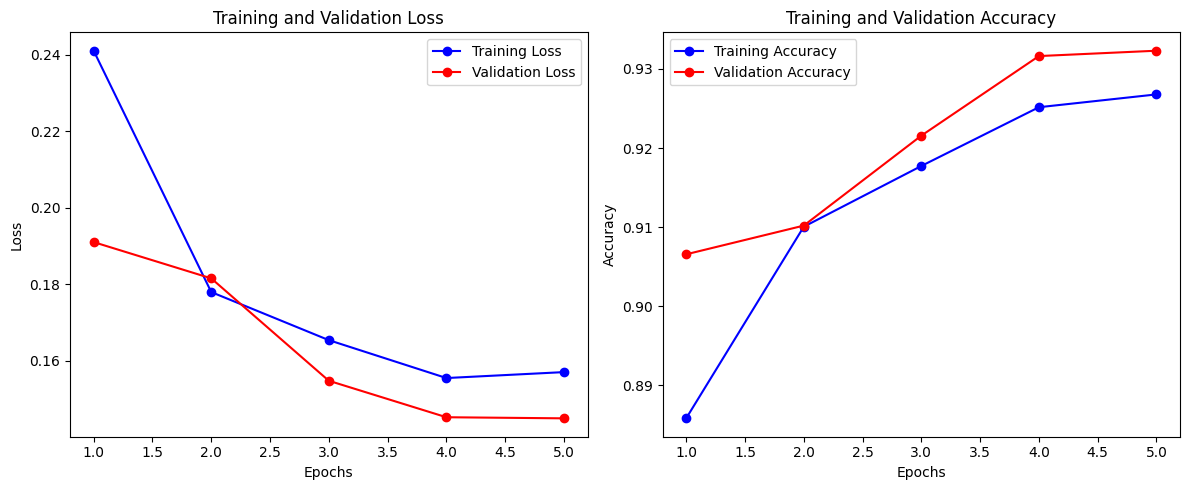

In [26]:
import matplotlib.pyplot as plt

# Access the training history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Plot loss vs epoch
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy vs epoch
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Adjust subplot spacing
plt.show()


In [27]:

# Make predictions on the test data
y_pred = model.predict(X_test)


1611/1611 [==============================] - 63s 38ms/step


In [30]:
y_pred_classes = tf.argmax(y_pred, axis=1)

In [31]:
confusion_matrix(y_test, y_pred_classes)

array([[15732,   130,   129, ...,     3,     1,  2075],
       [ 3050,  3062,  1322, ...,   597,   812,  2869],
       [    0,     0,     0, ...,     0,     0,     0],
       ...,
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0]])

In [32]:
print(confusion_matrix)

<function confusion_matrix at 0x7f5049f51ab0>


In [ ]:
# Save the model
model.save('my_model.h5')